<a href="https://colab.research.google.com/github/tfrbf/Deep/blob/main/diabets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.tree import DecisionTreeClassifier
from prettytable import PrettyTable

# preparing the data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')  # Replace with your actual file path
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
features = ['Age', 'Pregnancies', 'BMI', 'Glucose'] #30, 2,27,100
target = 'Outcome'

In [9]:
X = data[features]
Y = data[target]
num_classes = len(np.unique(Y))
#y = keras.utils.to_categorical(Y,num_classes) #?

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Attention!!!
Standardization means that we change each feature of the data so that its mean is zero and its standard deviation is one. This is done by subtracting the average and dividing by the standard deviation of each feature.

Normalization, however, usually means changing the range of data to [0, 1] or [-1, 1] and is mostly done using methods such as Min-Max scaling.

**Therefore, we are obviously doing standardization here, but this step is usually called data normalization**

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
x_t = np.array([[20,0,21,40]])
x_t_n = scaler.transform(x_t)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# SVM



In [37]:
svm_model = SVC(kernel='rbf',gamma=1,random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7662337662337663
Confusion Matrix:
[[80 19]
 [17 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nKNN Accuracy: {accuracy_knn}")

print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))



KNN Accuracy: 0.7792207792207793

KNN Confusion Matrix:
[[82 17]
 [17 38]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        99
           1       0.69      0.69      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



# Decision Tree

In [48]:
from sklearn.metrics import roc_curve, auc
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy: {accuracy_dt}")

print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 0.6883116883116883

Decision Tree Confusion Matrix:
[[73 26]
 [22 33]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        99
           1       0.56      0.60      0.58        55

    accuracy                           0.69       154
   macro avg       0.66      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



# Building the model

In [ ]:
# model = Sequential([
#     Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),

#     Dense(2,activation='softmax')  # Linear activation for regression
# ])

In [ ]:
# model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics = ['accuracy'])
# model.summary()
y_train.shape
y_train[0]

1

In [ ]:
svc=SVC()
# fit classifier to training set
svc.fit(X_train , y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
voice_svm_acc = accuracy_score(y_test, y_pred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(voice_svm_acc))

Model accuracy score with default hyperparameters: 0.7727


Train the model

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

NameError: name 'model' is not defined

# Resluts

NameError: name 'history' is not defined

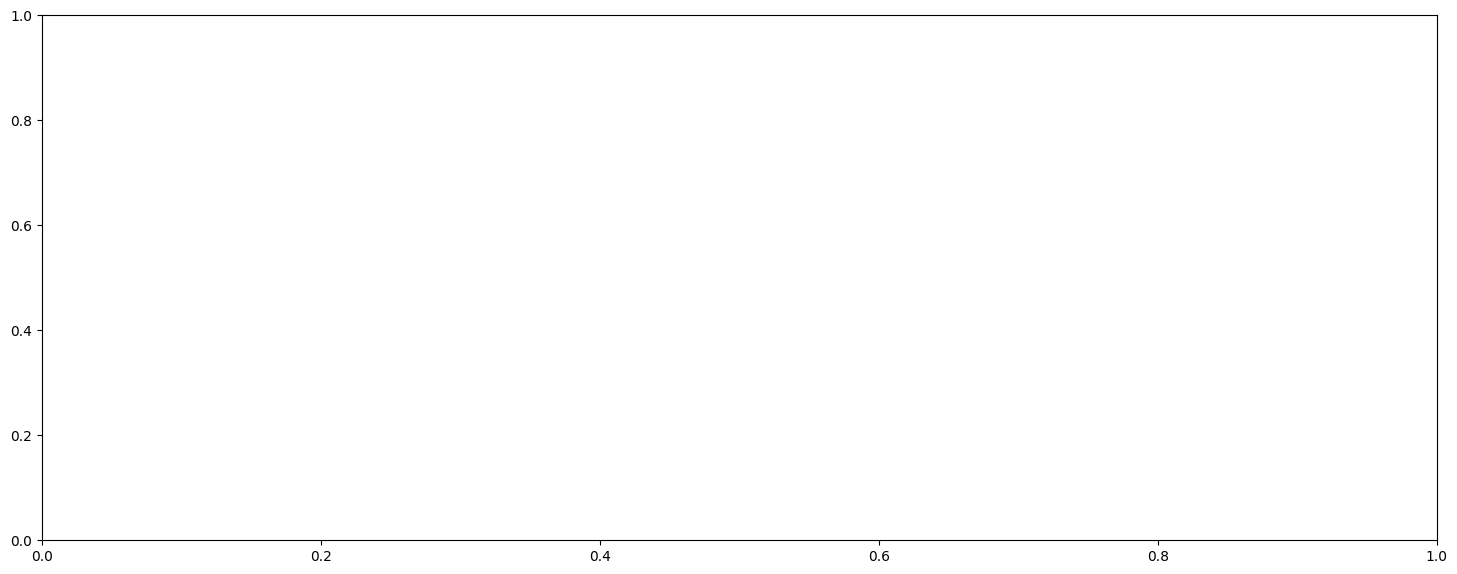

In [ ]:
plt.figure(figsize=(18,15))
plt.subplot(2,1,1)
plt.plot(history.epoch, history.history['loss'],c = 'r',label = 'training loss')
plt.plot(history.epoch, history.history['val_loss'],c = 'b', label = 'validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(2,1,2)
plt.plot(history.epoch, history.history['accuracy'],c = 'r',label = 'training acc')
plt.plot(history.epoch, history.history['val_accuracy'],c = 'b', label = 'validation acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Linear SVM')

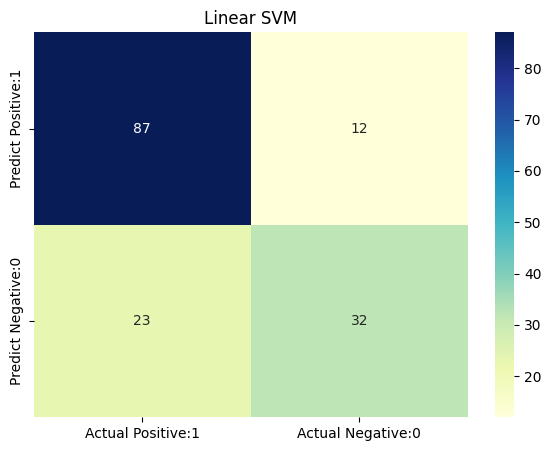

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize=(7,5))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Linear SVM')
# print(classification_report(y_test, y_pred_linear))

# Evaluateig

In [ ]:
score = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

NameError: name 'model' is not defined

In [ ]:
model.predict(x_t_n)